In [1]:
from joblib import load
import numpy as np
import pandas as pd

In [2]:
Y = load("motores_simulados.joblib")

In [3]:
X = load("posiciones_simuladas.joblib")

In [4]:
#Shuffle
idx = np.arange(len(Y))
np.random.seed(42)
np.random.shuffle(idx)
X = X[list(idx)]
Y = Y[list(idx)]

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [6]:
yscaler = MinMaxScaler((-1,1)).fit(Y)
Y = yscaler.transform(Y)

In [7]:
scaler = MinMaxScaler((-1,1))

In [8]:
regressor = MLPRegressor(
    verbose=False,
    random_state=42, 
    activation="relu",
    early_stopping=True,
    max_iter = 800,
)

In [9]:
model = Pipeline(steps =[
    ("scaler", scaler),
    ("nn", regressor),
])

In [10]:
param_grid = {"nn__hidden_layer_sizes":[ (50,), (75,), (100,), (125,)],
             "nn__learning_rate_init": [0.0001,0.0005,0.001,0.005,0.01,0.05],
             "nn__alpha": [0.0001,0.0005,0.001,0.005,0.01,0.05],
            }

In [11]:
cv_1layer = GridSearchCV(model, param_grid, scoring=make_scorer(r2_score), verbose=1, n_jobs=-1, cv=5)

In [12]:
cv_1layer.fit(X, Y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.7min
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        MinMaxScaler(feature_range=(-1, 1))),
                                       ('nn',
                                        MLPRegressor(early_stopping=True,
                                                     max_iter=800,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid={'nn__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,
                                       0.05],
                         'nn__hidden_layer_sizes': [(50,), (75,), (100,),
                                                    (125,)],
                         'nn__learning_rate_init': [0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.05]},
             scoring=make_scorer(r2_score), verbose=1)

In [13]:
cv_1layer.best_score_

0.9276849736393611

In [14]:
cv_1layer.best_params_

{'nn__alpha': 0.0005,
 'nn__hidden_layer_sizes': (100,),
 'nn__learning_rate_init': 0.005}

In [15]:
from joblib import dump

In [16]:
#Esta linea sobre escribe el archivo con la red simulada
#dump(cv_1layer, "red_simulada_magica.joblib")

Vamos a sacar la curva de entrenamiento de la red neuronal y a guardar los parámetros necesarios para reproducirla en matlab en un txt.

In [33]:
regressor = MLPRegressor(
    verbose=2,
    random_state=42, 
    activation="relu",
    early_stopping=True,
    max_iter = 1000,
    learning_rate_init=0.005,
    alpha=0.0005,
    hidden_layer_sizes=(100,),
)
model = Pipeline(steps=[("scaler", scaler), ("nn", regressor)]).fit(X,Y)

Iteration 1, loss = 0.21477027
Validation score: -0.977876
Iteration 2, loss = 0.09013832
Validation score: 0.203246
Iteration 3, loss = 0.03927790
Validation score: 0.457706
Iteration 4, loss = 0.03071531
Validation score: 0.488617
Iteration 5, loss = 0.02808863
Validation score: 0.578763
Iteration 6, loss = 0.02310473
Validation score: 0.633035
Iteration 7, loss = 0.01994039
Validation score: 0.666854
Iteration 8, loss = 0.01785576
Validation score: 0.694335
Iteration 9, loss = 0.01630981
Validation score: 0.718496
Iteration 10, loss = 0.01486371
Validation score: 0.742887
Iteration 11, loss = 0.01355053
Validation score: 0.765015
Iteration 12, loss = 0.01247288
Validation score: 0.780592
Iteration 13, loss = 0.01159770
Validation score: 0.793470
Iteration 14, loss = 0.01083917
Validation score: 0.804483
Iteration 15, loss = 0.01023381
Validation score: 0.813683
Iteration 16, loss = 0.00974913
Validation score: 0.820746
Iteration 17, loss = 0.00932850
Validation score: 0.826798
Itera

Iteration 143, loss = 0.00432408
Validation score: 0.909978
Iteration 144, loss = 0.00424563
Validation score: 0.907958
Iteration 145, loss = 0.00426709
Validation score: 0.909007
Iteration 146, loss = 0.00421132
Validation score: 0.909945
Iteration 147, loss = 0.00421380
Validation score: 0.909436
Iteration 148, loss = 0.00418875
Validation score: 0.911491
Iteration 149, loss = 0.00416985
Validation score: 0.908322
Iteration 150, loss = 0.00420559
Validation score: 0.909804
Iteration 151, loss = 0.00418783
Validation score: 0.910437
Iteration 152, loss = 0.00418418
Validation score: 0.910709
Iteration 153, loss = 0.00417678
Validation score: 0.910797
Iteration 154, loss = 0.00415469
Validation score: 0.910862
Iteration 155, loss = 0.00412188
Validation score: 0.911103
Iteration 156, loss = 0.00413556
Validation score: 0.910808
Iteration 157, loss = 0.00415333
Validation score: 0.911662
Iteration 158, loss = 0.00412117
Validation score: 0.909699
Iteration 159, loss = 0.00411532
Validat

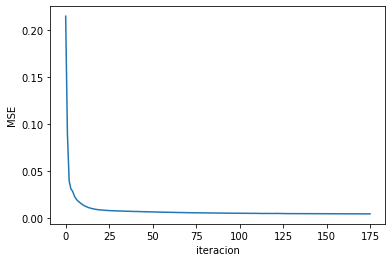

In [34]:
from matplotlib import pyplot as plt
plt.plot(model.steps[1][1].loss_curve_);
plt.xlabel("iteracion");
plt.ylabel("MSE");

In [35]:
W1, W2 = model.steps[1][1].coefs_

In [36]:
b1, b2 = model.steps[1][1].intercepts_

In [37]:
np.savetxt("W1.txt", W1)
np.savetxt("W2.txt", W2)
np.savetxt("b1.txt", b1)
np.savetxt("b2.txt", b2)

In [38]:
yscaler.min_

array([-2.91309406,  0.64788649, -1.32010107, -0.62476355,  2.36218763,
        0.75120824,  0.93843601, -0.7078645 ])

In [39]:
yscaler.scale_

array([0.00457098, 0.00138739, 0.00113162, 0.00292659, 0.00276628,
       0.00138752, 0.00186869, 0.00139023])

In [40]:
Y_real = load("motores_simulados.joblib")

In [41]:
np.savetxt("ymin.txt", Y_real.min(axis=0))
np.savetxt("ymax.txt", Y_real.max(axis=0))

In [42]:
X_real = load("posiciones_simuladas.joblib")

In [43]:
np.savetxt("xmin.txt", X_real.min(axis=0))
np.savetxt("xmax.txt", X_real.max(axis=0))

In [44]:
Y_real.min(axis=0)

array([  418.53006622, -1187.76117984,   282.86970592,  -128.21645019,
       -1215.41714194, -1262.11348393, -1037.32495366,  -210.13458386])

In [45]:
Y_real.max(axis=0)

array([ 856.07265676,  253.79585326, 2050.24715714,  555.17371751,
       -492.42528218,  179.30673472,   32.94504363, 1228.47580777])

In [46]:
y_t=model.predict(np.array([[0.01,0.01]]))

In [47]:
yscaler.inverse_transform(y_t)

array([[ 648.23962555, -172.36680953,  628.50990558,  -10.02956575,
        -880.30282938,  -18.54494216,  -65.05409919,  874.6343071 ]])

In [48]:
y_t

array([[ 0.04999863,  0.40874672, -0.60886657, -0.65411594, -0.07297902,
         0.72547676,  0.81687024,  0.50807876]])